##Install the required packages:

In [1]:
!pip install torch_summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import torchvision
import torch.nn as nn
import torch
from torch import optim
import torch.nn.functional as F
from torchvision import models,datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchsummary import summary
from PIL import Image
import cv2, glob, numpy as np, pandas as pd
from glob import glob
device = 'cuda' if torch.cuda.is_available() else 'cpu'

##Build the model using the Traditional way

In [13]:
def get_model():
  model = nn.Sequential(
      nn.Conv2d(3, 64, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(64, 64, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      nn.Conv2d(64, 128, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(128, 128, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      nn.Conv2d(128, 256, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(256, 256, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(256, 256, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      nn.Conv2d(256, 512, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(512, 512, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(512, 512, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      nn.Conv2d(512, 512, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(512, 512, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.Conv2d(512, 512, kernel_size=(3, 3)),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),

      nn.AdaptiveAvgPool1d(output_size=(7, 7)),
      nn.Linear(in_features=25088, out_features=4096, bias=True),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5, inplace=False),
      nn.Linear(in_features=4096, out_features=4096, bias=True),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5, inplace=False),
      nn.Linear(in_features=4096, out_features=1000, bias=True)
      )
  return model

In [14]:
model = get_model()
summary(model)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            1,792
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            36,928
├─ReLU: 1-4                              --
├─MaxPool2d: 1-5                         --
├─Conv2d: 1-6                            73,856
├─ReLU: 1-7                              --
├─Conv2d: 1-8                            147,584
├─ReLU: 1-9                              --
├─MaxPool2d: 1-10                        --
├─Conv2d: 1-11                           295,168
├─ReLU: 1-12                             --
├─Conv2d: 1-13                           590,080
├─ReLU: 1-14                             --
├─Conv2d: 1-15                           590,080
├─ReLU: 1-16                             --
├─MaxPool2d: 1-17                        --
├─Conv2d: 1-18                           1,180,160
├─ReLU: 1-19                             --
├─Conv2d: 1-20                           2,359,808
├─ReLU: 1-21              

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            1,792
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            36,928
├─ReLU: 1-4                              --
├─MaxPool2d: 1-5                         --
├─Conv2d: 1-6                            73,856
├─ReLU: 1-7                              --
├─Conv2d: 1-8                            147,584
├─ReLU: 1-9                              --
├─MaxPool2d: 1-10                        --
├─Conv2d: 1-11                           295,168
├─ReLU: 1-12                             --
├─Conv2d: 1-13                           590,080
├─ReLU: 1-14                             --
├─Conv2d: 1-15                           590,080
├─ReLU: 1-16                             --
├─MaxPool2d: 1-17                        --
├─Conv2d: 1-18                           1,180,160
├─ReLU: 1-19                             --
├─Conv2d: 1-20                           2,359,808
├─ReLU: 1-21              

##Build the model in better way using classes

In [15]:
class VGG16(nn.Module):
  def __init__(self, num_classes=1000):
    super(VGG16, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer2 = nn.Sequential(
        nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(), 
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.layer3 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer4 = nn.Sequential(
        nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.layer5 = nn.Sequential(
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer6 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer7 = nn.Sequential(
        nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.layer8 = nn.Sequential(
        nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer9 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer10 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.layer11 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer12 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.ReLU())
    self.layer13 = nn.Sequential(
        nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2))
    self.fc = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(7*7*512, 4096),
        nn.ReLU())
    self.fc1 = nn.Sequential(
        nn.Dropout(0.5),
        nn.Linear(4096, 4096),
        nn.ReLU())
    self.fc2= nn.Sequential(
        nn.Linear(4096, num_classes))
      
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = self.layer5(out)
    out = self.layer6(out)
    out = self.layer7(out)
    out = self.layer8(out)
    out = self.layer9(out)
    out = self.layer10(out)
    out = self.layer11(out)
    out = self.layer12(out)
    out = self.layer13(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    out = self.fc1(out)
    out = self.fc2(out)
    return out

In [16]:
model = VGG16()
summary(model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       1,792
|    └─ReLU: 2-2                         --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-3                       36,928
|    └─ReLU: 2-4                         --
|    └─MaxPool2d: 2-5                    --
├─Sequential: 1-3                        --
|    └─Conv2d: 2-6                       73,856
|    └─ReLU: 2-7                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-8                       147,584
|    └─ReLU: 2-9                         --
|    └─MaxPool2d: 2-10                   --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-11                      295,168
|    └─ReLU: 2-12                        --
├─Sequential: 1-6                        --
|    └─Conv2d: 2-13                      590,080
|    └─ReLU: 2-14                        --
├─Sequential: 1-7                        --
|

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Conv2d: 2-1                       1,792
|    └─ReLU: 2-2                         --
├─Sequential: 1-2                        --
|    └─Conv2d: 2-3                       36,928
|    └─ReLU: 2-4                         --
|    └─MaxPool2d: 2-5                    --
├─Sequential: 1-3                        --
|    └─Conv2d: 2-6                       73,856
|    └─ReLU: 2-7                         --
├─Sequential: 1-4                        --
|    └─Conv2d: 2-8                       147,584
|    └─ReLU: 2-9                         --
|    └─MaxPool2d: 2-10                   --
├─Sequential: 1-5                        --
|    └─Conv2d: 2-11                      295,168
|    └─ReLU: 2-12                        --
├─Sequential: 1-6                        --
|    └─Conv2d: 2-13                      590,080
|    └─ReLU: 2-14                        --
├─Sequential: 1-7                        --
|

##We can simply import it from torchvision

In [17]:
model = models.vgg16().to(device)
summary(model, torch.zeros(1,3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─ReLU: 2-12                        [-1, 256, 56, 56]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        36,928
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       73,856
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       147,584
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         295,168
|    └─ReLU: 2-12                        [-1, 256, 56, 56]      

##Setup for kaggle

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

In [20]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


###Download Data

In [21]:
!kaggle datasets download -d tongpython/cat-and-dog
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

##Build the DataLoader class

In [22]:
from random import shuffle, seed
seed(10)
train_data_dir = 'training_set/training_set'
test_data_dir = 'test_set/test_set'
class CatsDogs(Dataset):
  def __init__(self, folder):
    cats = glob(folder+'/cats/*.jpg')
    dogs = glob(folder+'/dogs/*.jpg')
    self.fpaths = cats[:500] + dogs[:500]
    self.normalize = transforms.Normalize(mean=[0.485,0.456, 0.406],
                                          std=[0.229, 0.224, 0.225])
    shuffle(self.fpaths)
    self.targets =[fpath.split('/')[-1].startswith('dog') \
                    for fpath in self.fpaths]

  def __len__(self):
    return len(self.fpaths)
  def __getitem__(self, ix):
    f = self.fpaths[ix]
    target = self.targets[ix]
    im = (cv2.imread(f)[:,:,::-1])
    im = cv2.resize(im, (224,224))
    im = torch.tensor(im/255)
    im = im.permute(2,0,1)
    im = self.normalize(im)
    return im.float().to(device), \
            torch.tensor([target]).float().to(device)

##Plot some images

tensor([0.], device='cuda:0')


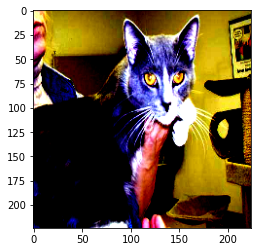

In [23]:
from matplotlib import pyplot as plt
data = CatsDogs(train_data_dir)
im, label = data[200]
plt.imshow(im.permute(1,2,0).cpu())
print(label)

In [24]:
def get_model():
  model = models.vgg16(pretrained=True)
  for param in model.parameters():
    param.requires_grad = False
  model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
  model.classifier = nn.Sequential(nn.Flatten(),
  nn.Linear(512, 128),
  nn.ReLU(),
  nn.Dropout(0.2),
  nn.Linear(128, 1),
  nn.Sigmoid())
  
  loss_fn = nn.BCELoss()
  optimizer = torch.optim.Adam(model.parameters(),lr= 1e-3)
  return model.to(device), loss_fn, optimizer

In [25]:
model, criterion, optimizer = get_model()
summary(model, torch.zeros(1,3,224,224))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        (1,792)
|    └─ReLU: 2-2                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-3                       [-1, 64, 224, 224]        (36,928)
|    └─ReLU: 2-4                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-5                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-6                       [-1, 128, 112, 112]       (73,856)
|    └─ReLU: 2-7                         [-1, 128, 112, 112]       --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       (147,584)
|    └─ReLU: 2-9                         [-1, 128, 112, 112]       --
|    └─MaxPool2d: 2-10                   [-1, 128, 56, 56]         --
|    └─Conv2d: 2-11                      [-1, 256, 56, 56]         (295,168)
|    └─ReLU: 2-12                        [-1, 256, 56,

In [26]:
def train_batch(x, y, model, opt, loss_fn):
  model.train()
  prediction = model(x)
  batch_loss = loss_fn(prediction, y)
  batch_loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
  model.eval()
  prediction = model(x)
  is_correct = (prediction > 0.5) == y
  return is_correct.cpu().numpy().tolist()
  
def get_data():
  train = CatsDogs(train_data_dir)
  trn_dl = DataLoader(train, batch_size=32, shuffle=True, \
  drop_last = True)
  val = CatsDogs(test_data_dir)
  val_dl = DataLoader(val, batch_size=32, shuffle=True, \
  drop_last = True)
  return trn_dl, val_dl
  
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [27]:
train_losses, train_accuracies = [], []
val_accuracies = []
for epoch in range(5):
  print(f" epoch {epoch + 1}/5")
  train_epoch_losses, train_epoch_accuracies = [], []
  val_epoch_accuracies = []
  for ix, batch in enumerate(iter(trn_dl)):
    x, y = batch
    batch_loss = train_batch(x, y, model, optimizer, \
    loss_fn)
    train_epoch_losses.append(batch_loss)    
    is_correct = accuracy(x, y, model)
    train_epoch_accuracies.extend(is_correct)
    
  for ix, batch in enumerate(iter(val_dl)):
    x, y = batch
    val_is_correct = accuracy(x, y, model)
    val_epoch_accuracies.extend(val_is_correct)

  train_epoch_loss = np.array(train_epoch_losses).mean()
  train_epoch_accuracy = np.mean(train_epoch_accuracies)
  val_epoch_accuracy = np.mean(val_epoch_accuracies)
  train_losses.append(train_epoch_loss)
  train_accuracies.append(train_epoch_accuracy)
  val_accuracies.append(val_epoch_accuracy)

 epoch 1/5
 epoch 2/5
 epoch 3/5
 epoch 4/5
 epoch 5/5


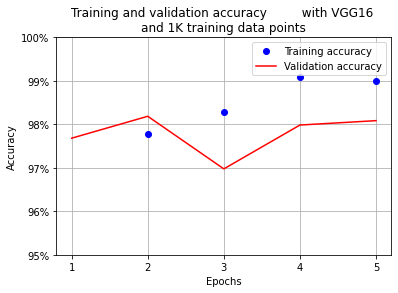

In [28]:
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy \
        with VGG16 \nand 1K training data points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0.95,1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) \
                            for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()